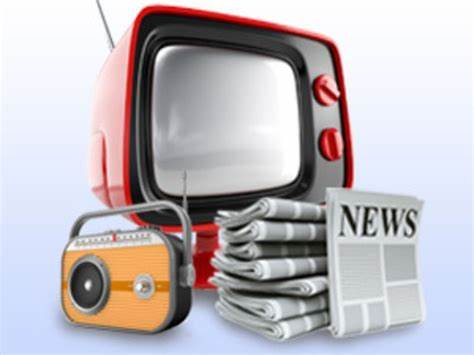

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading the dataset from the local disk

In [67]:
data = pd.read_csv("F:/datasets/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## statistical or data analysis

In [4]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## data visuvalization

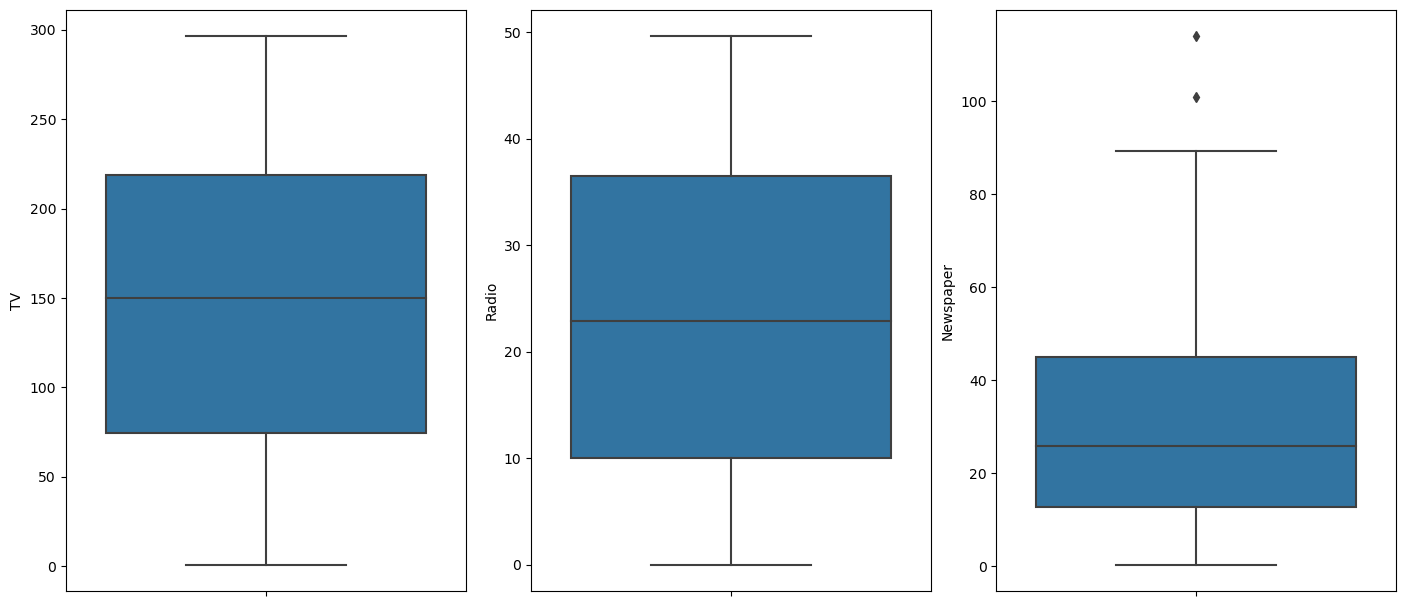

In [13]:
## data visuvalization using boxplot for finding the outliers in the data


fig ,ax = plt.subplots(ncols=3, nrows = 1, figsize = (14,6))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if index<3:
        sns.boxplot(y = col, data = data, ax = ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

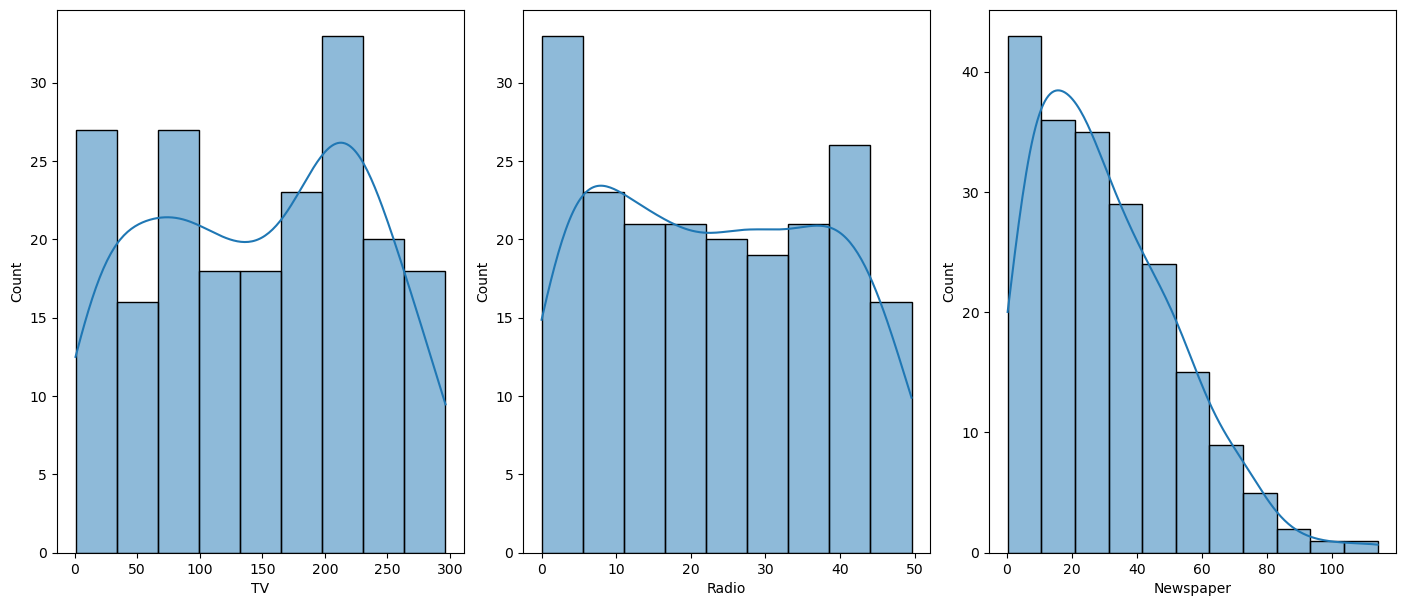

In [15]:
## data visuvalization using the histplot


fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (14,6))

index = 0
ax = ax.flatten()

for col, value in data.items():
    if index < 3:
        sns.histplot(data=value, ax = ax[index], kde=True)
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

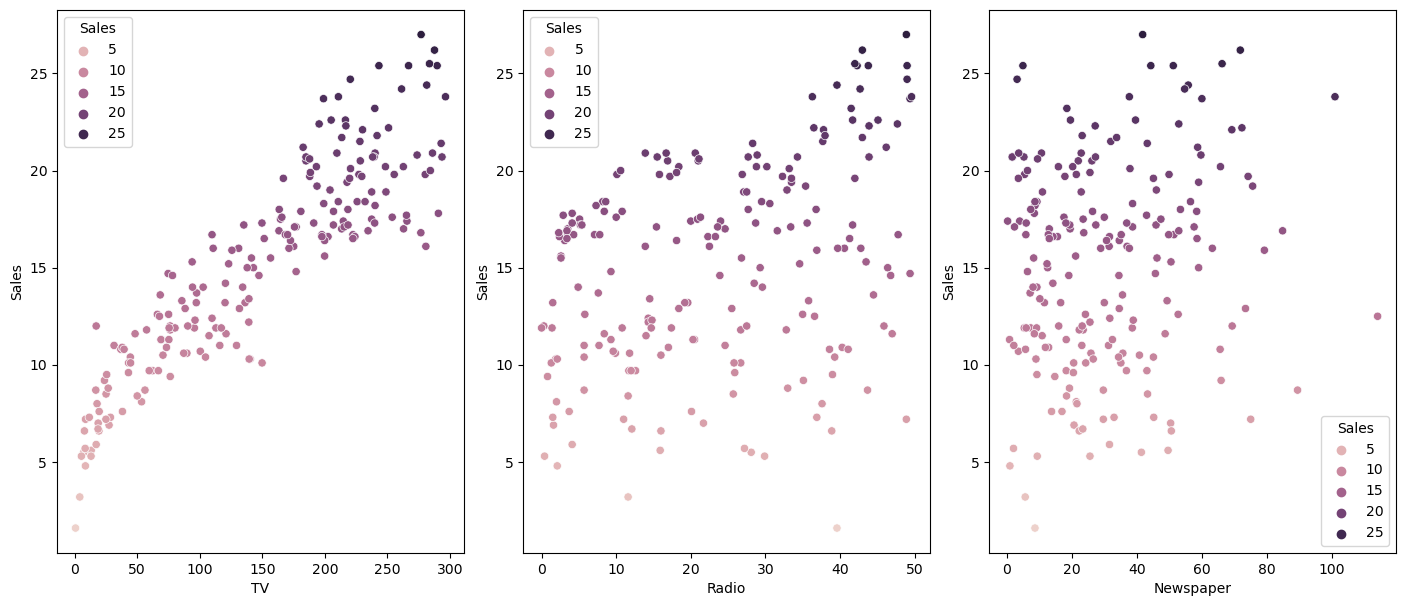

In [16]:
## data visuvalization using scatter pot


fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (14,6))

index = 0
ax = ax.flatten()

for col, value in data.items():
    if index < len(data.columns) -1:
        sns.scatterplot(x = data.columns[index],
                       y = "Sales",
                       data = data,
                       ax = ax[index],
                       hue="Sales")
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

## Spliting the dataset into train and test

In [17]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
Y = scaler.fit_transform(y.reshape(-1,1))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [25]:
x[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [26]:
y[0:5]

array([22.1, 10.4, 12. , 16.5, 17.9])

## Linear regression Model

In [27]:
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

LinearRegression()

In [33]:
model_lin.coef_

array([[ 0.62299564,  0.22585381, -0.02315819]])

In [34]:
model_lin.intercept_

array([0.12906239])

In [29]:
lin_pred = model_lin.predict(x_test)
lin_pred

array([[0.55869788],
       [0.3533688 ],
       [0.48082322],
       [0.75704819],
       [0.91475545],
       [0.56724589],
       [0.80902072],
       [0.36779546],
       [0.43101666],
       [0.33467167],
       [0.71675791],
       [0.73566614],
       [0.51458249],
       [0.55956894],
       [0.56616932],
       [0.35707364],
       [0.55973948],
       [0.68026048],
       [0.26877383],
       [0.50066544],
       [0.4109079 ],
       [0.7705688 ],
       [0.60509501],
       [0.80773443],
       [0.60902594],
       [0.34403379],
       [0.36306227],
       [0.61744895],
       [0.25580315],
       [0.30767026],
       [0.77823712],
       [0.35444156],
       [0.6771951 ],
       [0.77358985],
       [0.68845885],
       [0.33217363],
       [0.64402505],
       [0.80518225],
       [0.48508124],
       [0.85413347]])

In [30]:
print("Linear Regression mean_squared_error : ", mean_squared_error(lin_pred, y_test))

Linear Regression mean_squared_error :  0.0067161567472726015


In [66]:
print("Linear Regression mean_squared_error : ", mean_squared_error(lin_pred, y_test, squared=True))

Linear Regression mean_squared_error :  0.0067161567472726015


In [32]:
print("Linear Regression mean_absolute_error : ", mean_absolute_error(lin_pred, y_test))

Linear Regression mean_absolute_error :  0.06043098486507299


In [43]:
model = LinearRegression(n_jobs=10)
model.fit(x_train, y_train)

LinearRegression(n_jobs=10)

In [44]:
model.score(x_test,y_test)

0.847728341289504

In [45]:
model.coef_

array([[ 0.62299564,  0.22585381, -0.02315819]])

In [46]:
model.intercept_

array([0.12906239])

In [47]:
model_pred = model.predict(x_test)

In [48]:
print("Linear Regression mean_squared_error : ", mean_squared_error(model_pred, y_test))

Linear Regression mean_squared_error :  0.0067161567472726015


## Random Forest Regressor Model

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
fit = rfr.fit(x_train, y_train)
fit

C:\Users\santh\AppData\Local\Temp\ipykernel_6360\571674408.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = rfr.fit(x_train, y_train)


RandomForestRegressor()

In [50]:
rfr_pred = rfr.predict(x_test)

In [51]:
print("Random Forest Regressor mean_squared_error : ", mean_squared_error(rfr_pred, y_test))

Random Forest Regressor mean_squared_error :  0.0020887739475478916


In [53]:
rfr_model = RandomForestRegressor(
     n_estimators=200,
     criterion='squared_error',
     max_depth=5,
     min_samples_split=4,
     min_samples_leaf=2,
     max_features=1.0,
     max_leaf_nodes=None,
     n_jobs=10,
     random_state=10,
     max_samples=10
)

rfr_model.fit(x_train, y_train)

C:\Users\santh\AppData\Local\Temp\ipykernel_6360\4038003352.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(x_train, y_train)


RandomForestRegressor(max_depth=5, max_samples=10, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, n_jobs=10,
                      random_state=10)

In [54]:
rfr_model.score(x_test, y_test)

0.8042843433727223

In [56]:
rfr_model_pred = rfr_model.predict(x_test)

In [57]:
print("Random Forest Regressor mean_squared_error : ", mean_squared_error(rfr_model_pred, y_test))

Random Forest Regressor mean_squared_error :  0.00863231568458363


In [68]:
import pickle
pickle.dump(rfr, open('sales.pkl', 'wb'))

we got more score using Linear Regression = 0.847728341289504 compare to Random forest = 0.8042843433727223


we got more mean_squared_error values using Random Forest =0.00863231568458363 compain to Linear Regression = 0.0067161567472726015

with the help of mean_squared_error score i have decide that Random Forest algorithm is better for  this dataset